# Measuring Beam Profile

## Methodology

0. Ensure the alignment is good: The translation stage will move orthogonal to the propagation of the beam and the pinhole is set at the correct height.
1. Start by positioning the pinhole outside of the beam's spot (check with a fluorescent laser card if needed).
2. Log the position of micrometer.
3. Measure 20 samples of the power (~5 seconds of recording using ThorLabs power meter).
4. Record the mean power and the standard deviation.
5. Translate the pinhole by a certain interval.
6. Repeat steps 2-5 until you've traversed a cross-section of the beam.

Once the beam profile was measured and plotted, two dotted lines were drawn on top. These lines represent the `1/e^2` portion of the beam, which is the convention used by Thorlabs when quoting beam diameters/radii.

## Results

A spot-size of 2.3mm was found. The light comes out of the collimator at 2.27mm and the measurement was taken only 15cm from the collimator. Since the light is expected to expand as it propagates through free-space, this result is more-or-less what was expected!

As was intended, the data collection was complete overkill in the following ways:

* Number of samples (~20) per measurement: The std deviation was tiny w.r.t the mean.
* Number of points (~60): Figure 2 shows that I measured too much of the peak's head and tail. We can reach the same spot size by cutting off the first and last 15 point
* Interval (100um): This is where a delicate balance must be struck. From Figure 3, taking intervals of 200um (after cutting off the head and tail) reduces the accuracy of the fitting. The percentage difference between this new spot size and the more accurate one is 4.5%.

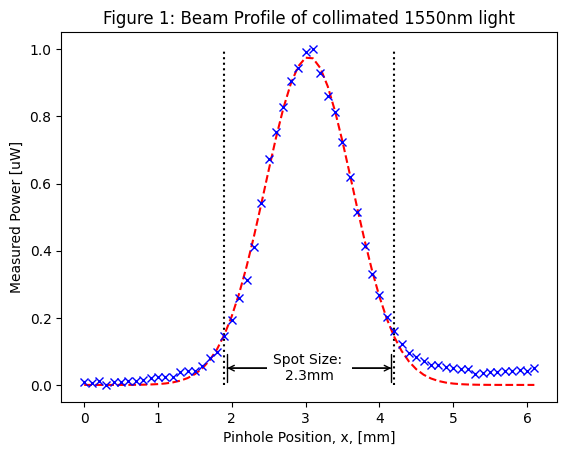

In [1]:
from analyse import get_data, normalise_data
from plot import plot_results
import matplotlib.pyplot as plt
df = get_data("./Data/","first-recording.csv")

norm_data = normalise_data(df)
half_the_data = norm_data.iloc[15:45]
large_intervals = half_the_data.iloc[::2]
plot_results(norm_data, "Figure 1: Beam Profile of collimated 1550nm light")
plt.savefig("manual-results.png")
#plot_results(half_the_data, "Figure 2: Same profile with reduced 'head' and 'tail'")
#plot_results(large_intervals, "Figure 3: Same profile with reduced 'head' & 'tail' and half the data points")
plt.show()

## Conclusion

The methodology should be changed:

* At the start, move to a minimum power that is just outside of where the power starts to ramp up (ie. just at the beginning of the tail/head).
* Take intervals of 150um.
* Since the 1/e^2 width is based on the peak, it's much more important to get a good sweep of this region instead of the head+tail
* Just type the values in directly into a spreadsheet instead of writing them down first!

## Faulty Conclusion!

Unfortunately, when I wrote this, I took half the data from the already-normalised-data. This meant that the model was still essentially based on the original data!
This conclusion informed the methodology for the second position's data collection.
The following plots are what _actually_ happen:


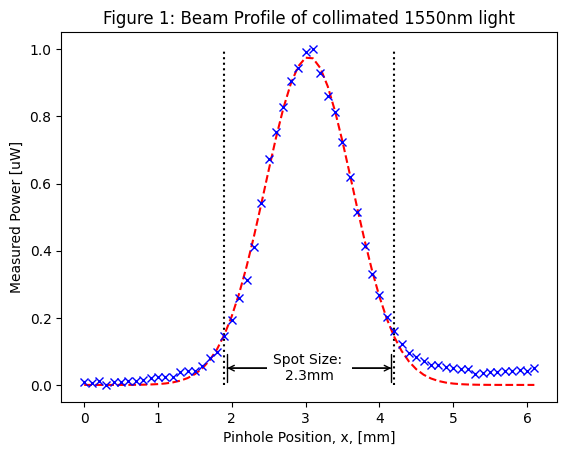

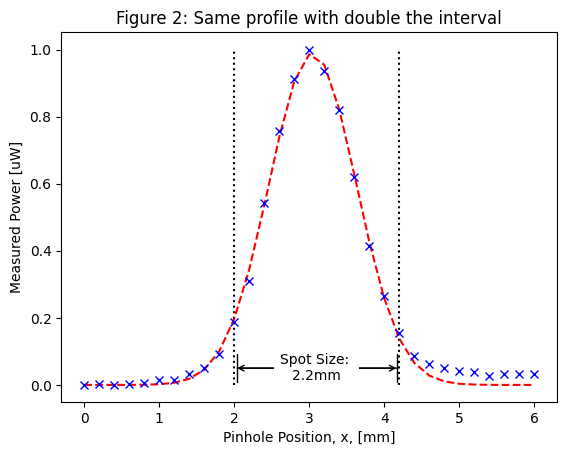

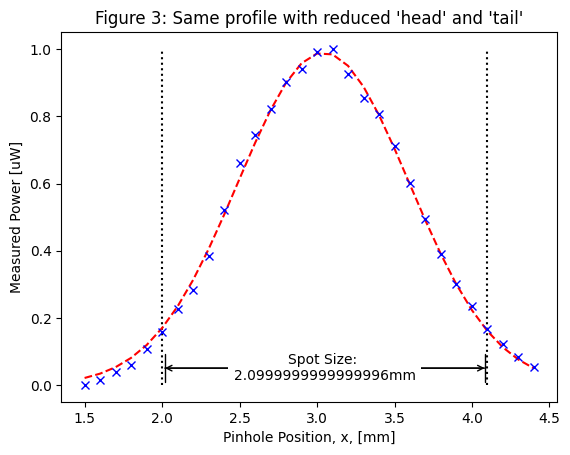

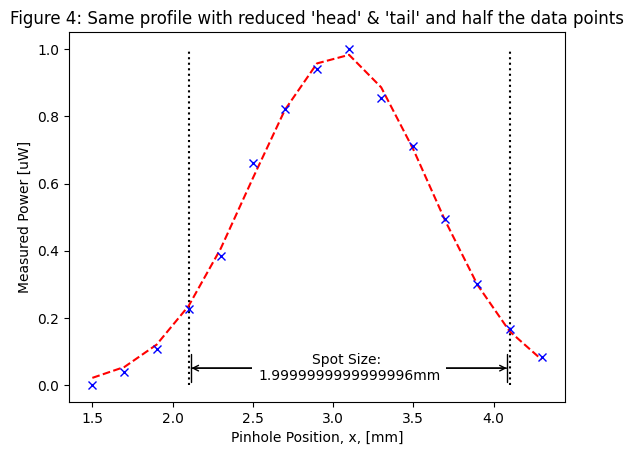

In [2]:
df = get_data("./Data/","first-recording.csv")
norm_data = normalise_data(df)
half_the_data = normalise_data(df.iloc[15:45])
large_intervals_half_data = normalise_data(df.iloc[15:45].iloc[::2])
large_intervals = normalise_data(df.iloc[::2])
plot_results(norm_data, "Figure 1: Beam Profile of collimated 1550nm light")
plot_results(large_intervals, "Figure 2: Same profile with double the interval")
plot_results(half_the_data, "Figure 3: Same profile with reduced 'head' and 'tail'")
plot_results(large_intervals_half_data, "Figure 4: Same profile with reduced 'head' & 'tail' and half the data points")
plt.show()

## REAL Conclusion!

Clearly, the head and tail are *very* important!! It's not something I should be leaving out.
From the large interval plot (Figure 2), it is clear that the head and tail don't need a small interval. We can get away with double the interval here. So let's try the following intervals:

* 0-15%: 150um
* 15-80%: 100um
* 80-100%: 50um

# First Position, higher power

This was done at a higher power compared to the first, ~5mW this time.
The start was chosen by taking 10% of the peak.
Increments of 150um were taken until 50% of the peak was reached, wherefrom 100um increments were taken

In [3]:
df = get_data("./Data/","first-2.csv", ',')

norm_data = normalise_data(df)
plot_results(norm_data, "Figure 4: Beam Profile of collimated 1550nm light")

df = get_data("./Data/","first-3.csv", ',')

norm_data = normalise_data(df)
plot_results(norm_data, "Figure 4: Beam Profile of collimated 1550nm light")
plt.show()

TypeError: get_data() takes 2 positional arguments but 3 were given

The same was then repeated at a lower power: ~500um

# Estimating Beam Waist & Position

This is next! I now need to repeat this with at least one other measurement of the beam profile.

In [ ]:
from analyse import plot_parametric
plot_parametric()